In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def alpha(P, Na_e, K_e):
    # Ideal solution parameters
    q = 1.6*10**(-19) # Unit charge, Coulombs
    F = 9.649 * 10**(4) # Coulombs/ mole
    R = 8.315 # Joules/ mole x Kelvin
    T = 300.15 # Kelvin

    # Define dimensionless variable & parameters

    gamma = 0.11

    # Define alpha
    alpha = (Na_e * np.exp(-3 * P) + K_e * np.exp(2 * P * gamma)) / (Na_e + K_e)

    return alpha


In [3]:
alpha(1, 437/1000, 20/1000)

0.10214110172539204

In [4]:
def mu(P, Na_e, K_e):
    # Define mu
    mu = (2 * (1 - alpha(P, Na_e, K_e))) ** (-1)

    return mu

In [5]:
mu(1, 437, 20)


0.5568803750353613

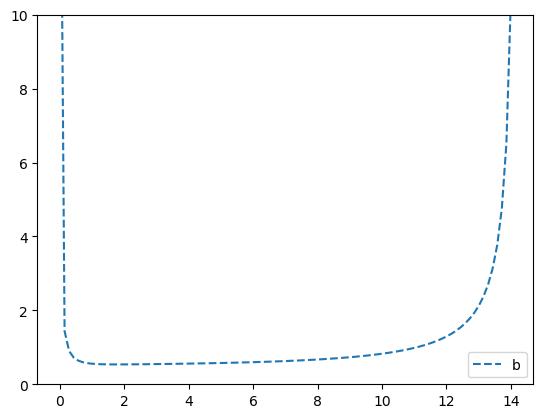

In [6]:
p_values = np.linspace(0.01, 14, 100)
mu_values = np.zeros((len(p_values), 1))

for i in range(len(p_values)):
    mu_values[i] = mu(p_values[i], 437, 20)

plt.plot(p_values, mu_values, '--')

plt.ylim(0,10)
plt.legend('blue')

In [7]:
def y(P, Na_e, K_e):
    zx = -1
    y_num = -zx + np.sqrt(zx**2 + 4*alpha(P, Na_e, K_e)*mu(P, Na_e, K_e)**2)
    y_den = 2*alpha(P, Na_e, K_e)*mu(P, Na_e, K_e)

    return y_num/y_den

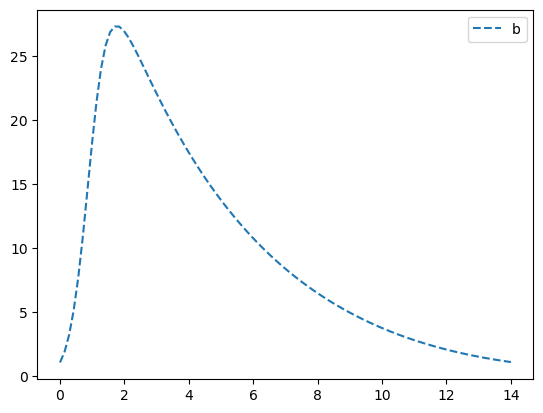

In [8]:
p_values = np.linspace(0.01, 14, 100)
y_values = np.zeros((len(p_values), 1))

for i in range(len(p_values)):
    y_values[i] = y(p_values[i], 437, 20)

plt.plot(p_values, y_values, '--')


plt.legend('blue')

In [9]:
def Na_i(P, Na_e, K_e):
    return Na_e * np.exp(-3*P) * y(P, Na_e, K_e)

In [10]:
def K_i(P, Na_e, K_e):
    gamma = 0.11
    return K_e * np.exp(2*P*gamma) * y(P, Na_e, K_e)

/var/folders/kg/6qgzh1c962vg2xt2n9swng0h0000gn/T/ipykernel_91811/470511099.py:3: RuntimeWarning: divide by zero encountered in scalar power
  mu = (2 * (1 - alpha(P, Na_e, K_e))) ** (-1)
/var/folders/kg/6qgzh1c962vg2xt2n9swng0h0000gn/T/ipykernel_91811/174694813.py:6: RuntimeWarning: invalid value encountered in scalar divide
  return y_num/y_den


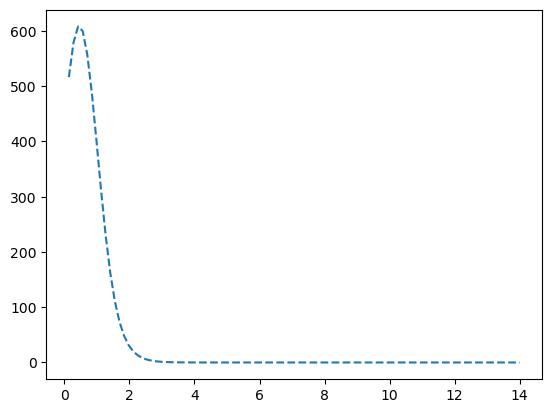

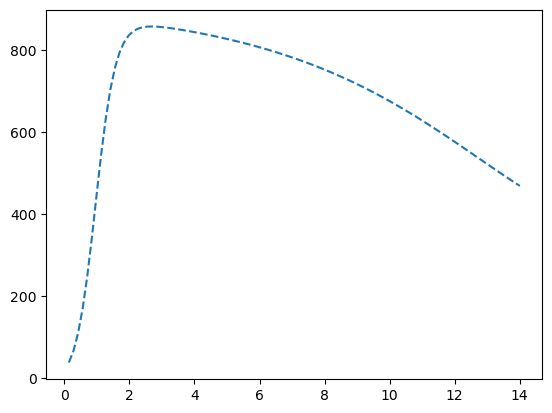

In [11]:
p_values = np.linspace(0.0, 14, 100)
nai_values = np.zeros((len(p_values), 1))
ki_values = np.zeros((len(p_values), 1))

for i in range(len(p_values)):
    nai_values[i] = Na_i(p_values[i], 437, 20)
    ki_values[i] = K_i(p_values[i], 437, 20)

plt.plot(p_values, nai_values, '--')
plt.show()
plt.plot(p_values, ki_values, '--')
plt.show()

In [12]:
def Vs(S_e, S_i, z):
    RTF = 25.8
    return RTF* np.log(S_e / S_i) 
    

In [13]:
def V(P, Na_e, K_e):
    # y=exp(-v), v = VF/RT
    RTF = 25.8
    return - np.log(y(P, Na_e, K_e)) * RTF

/var/folders/kg/6qgzh1c962vg2xt2n9swng0h0000gn/T/ipykernel_91811/470511099.py:3: RuntimeWarning: divide by zero encountered in scalar power
  mu = (2 * (1 - alpha(P, Na_e, K_e))) ** (-1)
/var/folders/kg/6qgzh1c962vg2xt2n9swng0h0000gn/T/ipykernel_91811/174694813.py:6: RuntimeWarning: invalid value encountered in scalar divide
  return y_num/y_den


(-100.0, 100.0)

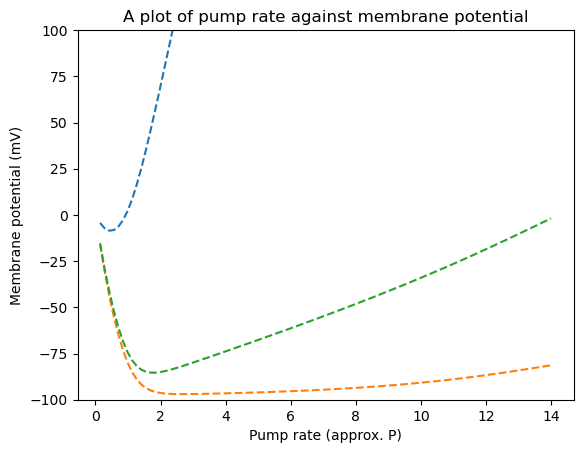

In [14]:
p_values = np.linspace(0.0, 14, 100)
Vna_values = np.zeros((len(p_values), 1))
Vk_values = np.zeros((len(p_values), 1))
V_values = np.zeros((len(p_values), 1))

Vna_values = Vs(437, nai_values, 1)
Vk_values = Vs(20, ki_values, 1)

for i in range(len(p_values)):
    V_values[i] = V(p_values[i], 437, 20)

plt.plot(p_values, Vna_values, '--')
plt.plot(p_values, Vk_values, '--')
plt.plot(p_values, V_values, '--')
plt.title("A plot of pump rate against membrane potential")
plt.xlabel("Pump rate (approx. P)")
plt.ylabel("Membrane potential (mV)")


plt.ylim(-100,100)